# Data Visualizations
Submitted by: Samantha Roska, Rebecca Hailperin-Lausch, and Samantha Russel

This file contains the visualizations we created to explore and understand the relationship between women in world governing bodies and world country democratic index scores, using the cleaned data files obtained and created in data_cleaning.ipynb

In [58]:
#importing in libraries
import numpy as np
import pandas as pd
import glob
import re
import warnings
import nbformat

#chloropleth libraries
import plotly.graph_objects as go
import plotly.express as px

#bar chart libraries
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.patches as mpatches

#set seaborn theme as default
sns.set_theme()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [59]:
#defining function to rename countries
def change_countries(x, countries):
    '''makes countries consistent across dataframes'''
    for country,variations in countries.items():
        for variation in variations.values():
            if x == variation:
                return country
    return x

## Analysis 1: Exploring democracy index score variables and women in government variables through box plots and histograms

To obtain context about the variables we are exploring in our analysis, we created boxplots and histograms. This allowed us to visualize their distributions as a starting point.

### Box Plot of democracy index data

In [60]:
# read in democracy data
dem_idx = pd.read_csv('./data/democracy_index_data.csv')

# create box plot
fig = px.box(dem_idx,
            y="five_year_mean",
            color="region",
            template='plotly_white',
            color_discrete_sequence=px.colors.qualitative.Prism,
            title= 'Box Plots of the Democracy Index Score by Region',
            width=800,
            height=400,
            )
fig.update_yaxes(title_text='Democracy Index Score (5 year mean)')
fig.show()

### Histogram of women in government data

In addition to having the percent women in parliments for each country for each year, it is helpful to look at the most recent data (only 2022). 

In [61]:
#read in data
women = pd.read_csv('./data/world_data_final.csv')

# convert to datetime
women['lower_single_house_elections'] = pd.to_datetime(women['lower_single_house_elections'])
women['upper_house_senate_elections_year'] = pd.to_datetime(women['upper_house_senate_elections'])

# get 2022 data
women2022 = women[(women['lower_single_house_elections'].dt.year== 2022)|(women['upper_house_senate_elections_year'].dt.year== 2022)]

# melt dataframe and rename columns (to look better in the visualization)
women_melted = women2022.reset_index().melt(id_vars=['country'],value_vars=['lower_single_house_percent_w','upper_house_senate_percent_w'],value_name='Percent Women',var_name='House')

# convert to percents (to look better in the visualization)
women_melted['Percent Women'] = round(women_melted.loc[:,'Percent Women']*100,2).astype(float)

In [62]:
# make histogram
fig = px.histogram(women_melted, x='Percent Women',
                    facet_col='House',
                    nbins=10,
                    width=800,
                    height=400,
                    template='plotly_white',
                    color_discrete_sequence=[px.colors.qualitative.Prism[1],px.colors.qualitative.Prism[2]],
                    title= 'Histogram of the Percent Women in Parliaments in Countries across the World in 2022',)

facet_titles = ['Lower Houses','Upper Houses']
for i, a in enumerate(fig.layout.annotations):
    a.text = facet_titles[i]

fig.show()

## Analysis 2: Exploring democracy index scores around the world

Next, we wanted to explore how democracy index scores differed around the world and over time. To do this, we created a world map cloropleth.

In [63]:
dem_index= pd.read_csv('./data/democracy_index_data.csv')
dem_index.columns = dem_index.columns.str.lower()

country_codes = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

country_codes = country_codes[['COUNTRY','CODE']]
country_codes.columns = country_codes.columns.str.lower()
df = pd.merge(dem_index,country_codes, on='country',how ="left")
df.shape

(167, 21)

In [64]:
#Finding the ISO codes that are empty after the merge
df[df['code'].isna()]

,region,2022_rank,country,regime_type,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2008,2006,five_year_mean,code
40,Central and Eastern Europe,72,North Macedonia,Flawed democracy,6.10,6.03,5.89,5.97,5.87,5.57,5.23,6.02,6.25,6.16,6.16,6.16,6.16,6.21,6.33,5.972,NaN
89,Asia and Australasia,166,Myanmar,Authoritarian,0.74,1.02,3.04,3.55,3.83,3.83,4.20,4.14,3.05,2.76,2.35,1.77,1.77,1.77,1.77,2.436,NaN
92,Asia and Australasia,165,North Korea,Authoritarian,1.08,1.08,1.08,1.08,1.08,1.08,1.08,1.08,1.08,1.08,1.08,1.08,1.08,0.86,1.03,1.080,NaN
97,Asia and Australasia,24,South Korea,Full democracy,8.03,8.16,8.01,8.00,8.00,8.00,7.92,7.97,8.06,8.06,8.13,8.06,8.11,8.01,7.88,8.040,NaN
101,Asia and Australasia,44,East Timor,Flawed democracy,7.06,7.06,7.06,7.19,7.19,7.19,7.24,7.24,7.24,7.24,7.16,7.22,7.22,7.22,6.41,7.112,NaN
115,Middle East and North Africa,110,Palestine,Authoritarian,3.86,3.94,3.83,3.89,4.39,4.46,4.49,4.57,4.72,4.80,4.80,4.97,5.44,5.83,6.01,3.982,NaN
128,Sub-Saharan Africa,35,Cape Verde,Flawed democracy,7.65,7.65,7.65,7.78,7.88,7.88,7.94,7.81,7.81,7.92,7.92,7.92,7.94,7.81,7.43,7.722,NaN
133,Sub-Saharan Africa,136,Republic of the Congo,Authoritarian,2.79,2.79,3.11,3.11,3.31,3.25,2.91,2.91,2.89,2.89,2.89,2.89,2.89,2.94,3.19,3.022,NaN
134,Sub-Saharan Africa,106,Ivory Coast,Hybrid regime,4.22,4.22,4.11,4.05,4.15,3.93,3.81,3.31,3.53,3.25,3.25,3.08,3.02,3.27,3.38,4.150,NaN
135,Sub-Saharan Africa,162,Democratic Republic of the Congo,Authoritarian,1.48,1.40,1.13,1.13,1.49,1.61,1.93,2.11,1.75,1.83,1.92,2.15,2.15,2.28,2.76,1.326,NaN


In [65]:
# https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes

missinf_df = df[df['code'].isna()]
drop_indexes = missinf_df.index
df2 = df.drop(index=[40, 89, 92, 97, 101, 115, 128, 133, 134, 135, 139, 142]).copy()


update_codes = { 'country': ['North Macedonia','Myanmar','East Timor','South Korea','North Korea','Palestine','Cape Verde','Republic of the Congo','Ivory Coast','Democratic Republic of the Congo','Eswatini','Gambia'] ,
                    'code':['MKD','MMR', 'TLS', 'KOR', 'PRK', 'PST', 'CPV','COG', 'CIV', 'COD', 'SWZ', 'GMB']}

temp_df = pd.DataFrame.from_dict(update_codes)
update_codes = pd.merge(missinf_df,temp_df, on='country', how='left')
update_codes = update_codes.drop(columns='code_x')
update_codes = update_codes.rename(columns={'code_y':'code'})

final_df = pd.concat([df2,update_codes])
final_df.shape

(167, 21)

In [66]:
fig = go.Figure(data=go.Choropleth(
    locations = final_df['code'],
    z = final_df['five_year_mean'],
    text = final_df['country'],
    colorscale = 'YlGnBu',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='seagreen',
    marker_line_width=0.5,
    colorbar_title = 'Score<br>(1-10)',
))

fig.update_layout(
    title_text='Democracy Index Score Five year Mean',
    height=900,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

In [67]:
years = ['2022', '2021', '2020','2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011','2010', '2008', '2006']
melt_df = pd.melt(final_df, id_vars =["region","country","code","five_year_mean"], value_vars =years,
              var_name ='year',value_name ='score')
melt_df = melt_df.sort_values('year')
melt_df.head()


,region,country,code,five_year_mean,year,score
2504,Sub-Saharan Africa,Gambia,GMB,4.402,2006,4.39
2396,Latin America and the Caribbean,Ecuador,ECU,6.026,2006,5.64
2395,Latin America and the Caribbean,Dominican Republic,DOM,6.448,2006,6.13
2394,Latin America and the Caribbean,Cuba,CUB,2.784,2006,3.52
2393,Latin America and the Caribbean,Costa Rica,CRI,8.144,2006,8.04


In [68]:
index_colors = ['#200211','#5d0e1a','#9b3327','#e3754f','#f1b26e','#f9e096','#b2d878','#7bbb6d','#489657','#2b6619']
# px.colors.diverging.Temps[::-1]


fig = px.choropleth(melt_df, 
        locations="code",
        color="score", 
        hover_name="country",
        color_continuous_scale=index_colors,
        hover_data={'year': False, 'five_year_mean': True, 'code': False},
        height=900,
        animation_frame="year",
        title='Democracy Index Score 2006-2022<br>Source: <a href="https://en.wikipedia.org/wiki/Democracy_Index">\
            Democracy Index</a>')

fig.show()

## Analysis 3: Exploring the relationship between these demcoratic index scores and the number of women in governing bodies for each country

From the chloropleth above, we found a wide range of democratic scores for countries around the world. This raised the question, do countries with more women in government have higher democratic index scores, and vice versa?

In [69]:
# comparing using January 2022

#ignore warnings
warnings.filterwarnings('ignore')

# read in necessary data and performing data cleaning
jan_22_data_full = pd.read_csv("data/world_data/wd_1_2022.csv")

cols = jan_22_data_full.iloc[4]

#renaming columns
cols[1] = 'Country'
cols[7] = 'upperseats'
cols[3] = 'lowerseats'
cols[8] = 'upperwomen'
cols[4] = 'lowerwomen'


jan_22_data = jan_22_data_full.iloc[5:]
jan_22_data.columns = cols

#replacing dashes with 0
jan_22_data['upperseats'] = jan_22_data['upperseats'].replace("-",0)
jan_22_data['upperwomen'] = jan_22_data['upperwomen'].replace("-",0)
jan_22_data['lowerseats'] = jan_22_data['lowerseats'].replace("-",0)
jan_22_data['lowerwomen'] = jan_22_data['lowerwomen'].replace("-",0)

#converting column types
jan_22_data['upperseats'] = jan_22_data['upperseats'].astype(int)
jan_22_data['lowerseats'] = jan_22_data['lowerseats'].astype(int)
jan_22_data['upperwomen'] = jan_22_data['upperwomen'].astype(int)
jan_22_data['lowerwomen'] = jan_22_data['lowerwomen'].astype(int)

#creating total columns
jan_22_data['totalseats'] = jan_22_data['lowerseats'] + jan_22_data['upperseats']
jan_22_data['totalwomen'] = jan_22_data['lowerwomen'] + jan_22_data['upperwomen']

#democracy score data
countries = pd.read_csv("data/democracy_index_data.csv")
countries_scores = countries[['country', '2022']]



In [70]:
#select data for graphing and creating total columns
plot_data2 = jan_22_data[['Country', 'totalseats', 'totalwomen']]

plot_data2 =plot_data2[plot_data2['totalseats'] > 0]
plot_data2['W%'] = plot_data2['totalwomen'] /plot_data2['totalseats']

plot_data2['Country'] = plot_data2['Country'].replace("United States of America", "United States")
plot_data2['Country'] = plot_data2['Country'].replace("Bolivia (Plurinational State of)", "Bolivia")

plot_data2 = plot_data2.merge(countries_scores, right_on='country', left_on='Country', how='left')
plot_data2 = plot_data2.dropna(subset=["2022"])

plot_data2['Country'] = plot_data2['Country'].replace("United Arab Emirates", "U.A.E.")

plot_data2 = plot_data2.sort_values("W%", ascending=False).iloc[np.r_[0:10, 64,-11:-1],:]


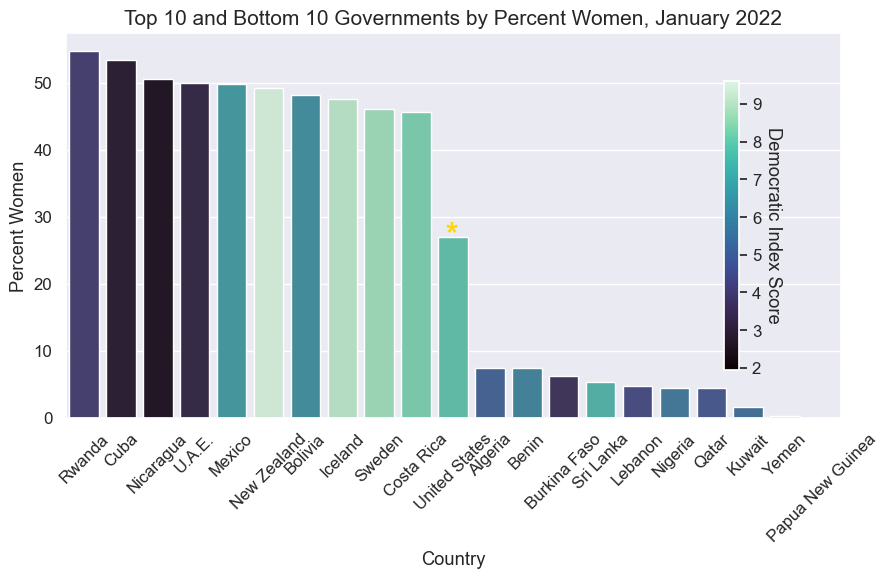

In [71]:
# set the figure size
plt.figure(figsize=(10, 5))
sns.set(font_scale=1.1)

# # from raw value to percentage
women2 = plot_data2.copy()
women2['total_seats'] = [round(i / j * 100,2) for i,j in zip(women2['totalwomen'], plot_data2['totalseats'])]
women2["2022"] = pd.to_numeric(women2["2022"])

#scipt to create continuous legend/colorbar
g = women2.groupby('Country')
rates = g['2022'].mean()
n = g.size()

plot = plt.scatter(n.index, n, c=rates, cmap='mako')
plt.clf()
cbar = plt.colorbar(plot, shrink=0.75)
cbar.ax.get_yaxis().labelpad = 15
cbar.set_label('Democratic Index Score', rotation=270)


#create bar chart
bar = sns.barplot(x="Country", y="total_seats", data=women2, hue='2022', dodge=False, palette='mako')
bar.legend_.remove()

#rotate country labels
bar.set_xticklabels(
    bar.get_xticklabels(),
    rotation=45,
)

#add titles
plt.title("Top 10 and Bottom 10 Governments by Percent Women, January 2022", fontsize=15)
plt.ylabel('Percent Women')

#emphasize U.S. by placing a star on top of the bar
plt.text(9.8, 26, "*", horizontalalignment='left', size='xx-large', color='gold', weight='extra bold')

# show the graph
plt.show()




We're not seeing a clear pattern emerge from this visualization. Let's do a correlation to quantify this relationship at the world level.

### Correlation between percent women in parliaments and democracy index

In order to run the correlation, the datasets need to be joined together into one dataframe. To do this, both datasets need to be reshaped (from wide to long) and both datasets need to have consistent columns to join on, in this case, country and year. As we started doing this, we realized that the datasets had different naming conventions for how they spell certain countries. For instance, one dataset had the US as the 'United States' and the other had it as 'United States of America'. This was true of many other countries as well. The file 'data/list_of_countries.csv' was obtained from [here](https://www.iban.com/country-codes) using pd.read_html(). The 'Country' column of this file will serve as our new standard for both datasets. Next, both datasets were manually inspected and variations in how the countries are spelled were added to the list_of_countries.csv file in the variations columns. Using this file and the custom function 'change_countries', we were able to convert the names of the countries to be consistent across both datasets, which allowed us to join them into one dataframe. 

In [72]:
# read in democracy index data
democracy_index = pd.read_csv('./data/democracy_index_data.csv')
# read in the percent women in parliments data
women_in_parliments =  pd.read_csv('./data/world_data_final.csv')

# get a list of years to be used to melt the dataframe
years_list = [str(year) for year in range(2010,2023)]
years_list.insert(0,'2008')
years_list.insert(0,'2006')
# melt dataframe from wide to long
democracy_index_melted = democracy_index.melt(id_vars=['region','2022_rank','country','regime_type','five_year_mean'],value_vars=years_list,var_name='year',value_name='democracy_index_score')

# groupby so that there is only one value for each year, get only lower house
lower_house = women_in_parliments[['country','lower_single_house_percent_w','lower_single_house_elections_year']].groupby(['country','lower_single_house_elections_year']).apply(lambda x: x['lower_single_house_percent_w'].mean(skipna=False)).dropna().reset_index()
lower_house = lower_house.rename({'lower_single_house_elections_year':'year',0:'lower_single_house_percent_w'},axis=1)
# groupby so that there is only one value for each year, get only upper house
upper_house = women_in_parliments[['country','upper_house_senate_percent_w','upper_house_senate_elections_year']].groupby(['country','upper_house_senate_elections_year']).apply(lambda x: x['upper_house_senate_percent_w'].mean(skipna=False)).dropna().reset_index()
upper_house = upper_house.rename({'upper_house_senate_elections_year':'year',0:'upper_house_senate_percent_w'},axis=1)

# merge upper and lower back together
parliaments = lower_house.merge(upper_house,on=['country','year'], how='outer')

# make sure there is not whitespace in country columns
democracy_index_melted['country'] = democracy_index_melted['country'].str.strip()
parliaments['country']  = parliaments['country'].str.strip()

# read in a list of countries and different spelling variations of those countries
countries = pd.read_csv('./data/list_of_countries.csv')
countries['Variation1'] = countries['Variation1'].astype(str)
countries['Variation2'] = countries['Variation2'].astype(str)
countries['Variation3'] = countries['Variation3'].astype(str)
countries_dict = countries.set_index('Country')[['Variation1','Variation2','Variation3']].to_dict(orient='index')

# make country names in both datasets consistent
parliaments['country'] = parliaments['country'].apply(change_countries,args=(countries_dict,))
democracy_index_melted['country'] = democracy_index_melted['country'].apply(change_countries,args=(countries_dict,))

# join the two datasets on year and country
df = democracy_index_melted.merge(parliaments, on=['country','year'], how='outer')

#### Overall correlation

In [73]:
corr = df[['democracy_index_score','lower_single_house_percent_w','upper_house_senate_percent_w']].corr()
corr

,democracy_index_score,lower_single_house_percent_w,upper_house_senate_percent_w
democracy_index_score,1.000000,0.310565,0.180674
lower_single_house_percent_w,0.310565,1.000000,0.626076
upper_house_senate_percent_w,0.180674,0.626076,1.000000


#### Correlation by region

There's a weak, positive correlation between democracy index scores and the percent of women in government at a national level. What happens when we do this correlation by region, to account for possible regional differences such as different cultural expectations for women?

In [74]:
corr_by_region = df.groupby('region')[['democracy_index_score','lower_single_house_percent_w','upper_house_senate_percent_w']].corr()
corr_by_region

democracy_index_score  \
region                                                                                
Asia and Australasia            democracy_index_score                      1.000000   
                                lower_single_house_percent_w               0.128786   
                                upper_house_senate_percent_w               0.293848   
Central and Eastern Europe      democracy_index_score                      1.000000   
                                lower_single_house_percent_w               0.067009   
                                upper_house_senate_percent_w              -0.442193   
Latin America and the Caribbean democracy_index_score                      1.000000   
                                lower_single_house_percent_w              -0.217821   
                                upper_house_senate_percent_w               0.327432   
Middle East and North Africa    democracy_index_score                      1.000000   
                                lower_single_house_percent_w               0.376117   
                                upper_house_senate_percent_w              -0.500286   
North America                   democracy_index_score                      1.000000   
                                lower_single_house_percent_w               0.205076   
                                upper_house_senate_percent_w              -0.971636   
Sub-Saharan Africa              democracy_index_score                      1.000000   
                                lower_single_house_percent_w               0.113238   
                                upper_house_senate_percent_w              -0.066918   
Western Europe                  democracy_index_score                      1.000000   
                                lower_single_house_percent_w               0.545194   
                                upper_house_senate_percent_w              -0.191058   

                                                              lower_single_house_percent_w  \
region                                                                                       
Asia and Australasia            democracy_index_score                             0.128786   
                                lower_single_house_percent_w                      1.000000   
                                upper_house_senate_percent_w                      0.885088   
Central and Eastern Europe      democracy_index_score                             0.067009   
                                lower_single_house_percent_w                      1.000000   
                                upper_house_senate_percent_w                      0.422929   
Latin America and the Caribbean democracy_index_score                            -0.217821   
                                lower_single_house_percent_w                      1.000000   
                                upper_house_senate_percent_w                      0.824936   
Middle East and North Africa    democracy_index_score                             0.376117   
                                lower_single_house_percent_w                      1.000000   
                                upper_house_senate_percent_w                      0.201189   
North America                   democracy_index_score                             0.205076   
                                lower_single_house_percent_w                      1.000000   
                                upper_house_senate_percent_w                      0.914636   
Sub-Saharan Africa              democracy_index_score                             0.113238   
                                lower_single_house_percent_w                      1.000000   
                                upper_house_senate_percent_w                      0.726346   
Western Europe                  democracy_index_score                             0.545194   
                                lower_single_house_percent_w                      1.00

As you can see, the relationships change when examined at a regional level. Some regions even have a negative correlation. To examine this further, we will look at one correlation that stands out as surprising: North America showed a -0.97 correlation between the democracy score and the percent women in the upper house. I'll start by checking for missing data.

In [75]:
# get the percent missing data in each column 
df[df['region']=='North America'].isna().sum()/len(df[df['region']=='North America'])

region                          0.00000
2022_rank                       0.00000
country                         0.00000
regime_type                     0.00000
five_year_mean                  0.00000
year                            0.00000
democracy_index_score           0.00000
lower_single_house_percent_w    0.62500
upper_house_senate_percent_w    0.78125
dtype: float64

The upper_house_senate_percent_w is misisng almost 80% of the data. This is likely partially because the US only holds Senate elections every 6 years. Given that each country has it's only timeline for elections and different types of governing bodies, it appears that we may not have enough data at the regional level to gain meaningful insights from these correlations. This is a surprising setback that we were not expecting. 

### Circular Barchart of women in government across the world, grouped by region

Another way to examine this relationship is by placing these countries in a circular barchart, grouped by region

In [76]:
# initialize dataframe and graphing functions

countries = pd.read_csv("data/democracy_index_data.csv")
plot_data = jan_22_data[['Country', 'totalseats', 'totalwomen']]


plot_data =plot_data[plot_data['totalseats'] > 0]
plot_data['W%'] = plot_data['totalwomen'] /plot_data['totalseats']

plot_data['Country'] = plot_data['Country'].replace("United States of America", "United States")

circularplotdata = plot_data.copy()

circulardata = countries[['region', 'country', '2022']].merge(circularplotdata, left_on='country', right_on='Country', how='inner')
circulardata = circulardata.drop('country', axis=1)

#reorder the dataframe
circulardata = (
    circulardata
    .groupby(["region"])
    .apply(lambda x: x.sort_values(["W%"], ascending = False))
    .reset_index(drop=True)
)

def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment


def add_labels(angles, values, labels, offset, ax):
    
    # This is the space between the end of the bar and the label
    padding = .25
    
    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        
        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)

        # And finally add the text
        ax.text(
            x=angle, 
            y=value + padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor"
        ) 

In [77]:
circulardata.groupby('region').size()

region
Asia and Australasia               21
Central and Eastern Europe         26
Latin America and the Caribbean    22
Middle East and North Africa       16
North America                       2
Sub-Saharan Africa                 37
Western Europe                     20
dtype: int64

Text(0.5, 1.0, 'Percent of Women in Government by Region, January 2022\n\n\n')

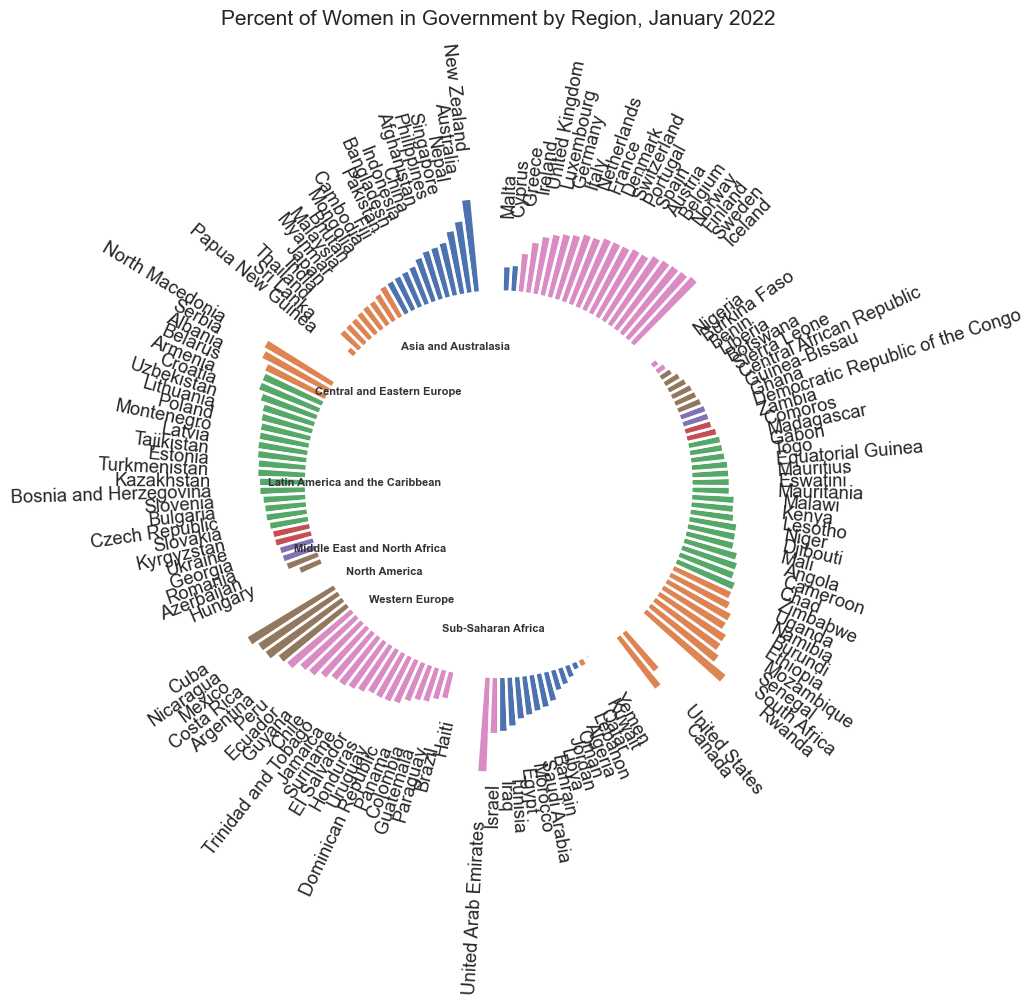

In [78]:
# help creating the circular bar chart from https://www.python-graph-gallery.com/circular-barplot-with-groups
VALUES = circulardata["W%"].values
LABELS = circulardata["Country"].values
GROUP = circulardata["region"].values

OFFSET = np.pi / 2

PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

offset = 0
IDXS = []
GROUPS_SIZE = [21, 26, 22, 16, 2, 37, 20]
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})
ax.set_theta_offset(OFFSET)
ax.set_ylim(-1, 1)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE =[11,13,17,2,2,6,20]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

# Extra customization below here --------------------

# This iterates over the sizes of the groups adding reference
# lines and annotations.

offset = 0 
for group, size in zip(list(set(circulardata.region)), GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    ax.plot(x1, [-1] * 50, color="#333333")
    
    # Add text to indicate group
    ax.text(
        np.mean(x1), -.25, group, color="#333333", fontsize=8, 
        fontweight="bold", ha="center", va="center"
    )
    
    # Add reference lines at 20, 40, 60, and 80
    x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=50)
    ax.plot(x2, [20] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [40] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [60] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [80] * 50, color="#bebebe", lw=0.8)
    
    offset += size + PAD

plt.title("Percent of Women in Government by Region, January 2022\n\n\n", fontsize=15)

    

## Analysis 4: Visualizing the relationship between democracy index scores and women in government by region, over time

In order to get a better sense of the relationship between the democracy index and the percent women in legislative bodies and how this relationship changes over time, we will create an interactive scatter plot. However, because many governments do not have a upper house or have longer periods of time between elections in upper houses, this led to a high rate of missing data for this column (84% missing). Futhermore, we found that the percent women in upper houses showed a weak correlation of 0.18 to the democracy index (see correlation section above). For these reasons, we will focus this visualzation on the percent of women in lower houses only. 

In [79]:
# plot lower house
# drop upper house annas so that the plot works
scatter_df = df.drop('upper_house_senate_percent_w',axis=1).dropna()
# make figure
fig = px.scatter(scatter_df, 
            x='democracy_index_score',
            y='lower_single_house_percent_w',
            template='plotly_white',    
            #hover_data=['country','year'],
            color='region',
            color_discrete_sequence=px.colors.qualitative.Prism,
            animation_frame='year',
            title= 'Democracy Index vs Percent Women in Lower Parliaments across Time',
            size='lower_single_house_percent_w',
            width=1200,
            height=800
        )

fig.update_xaxes(title_text='Democracy Index Score')
fig.update_yaxes(title_text='Percent Women in Lower Legislative Branches')

# write to html file so that it can be added to the github
fig.write_html("visualizations/interactive_scatter.html")

fig.show()